In [1]:
from numpy import mean, std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD

# Load train and test dataset
def load_dataset():
    # Load dataset
    (trainX, trainY), (testX, testY) = mnist.load_data()
    # Reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    # One hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

# Scale pixels
def prep_pixels(train, test):
    # Convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # Normalize to range 0-1
    train_norm /= 255.0
    test_norm /= 255.0
    # Return normalized images
    return train_norm, test_norm

# Define CNN model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    # Prepare cross-validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # Enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # Define model
        model = define_model()
        # Select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # Fit model
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        # Evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        # Store scores
        scores.append(acc)
        histories.append(history)
    return scores, histories

# Summarize diagnostic plots
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # Plot loss
        plt.subplot(2, 1, 1)
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='test')
        # Plot accuracy
        plt.subplot(2, 1, 2)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
        plt.tight_layout()
        plt.show()

# Summarize model performance
def summarize_performance(scores):
    # Print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # Box and whisker plots of results
    plt.boxplot(scores)
    plt.show()

def run_test_harness():
    # Load dataset
    trainX, trainY, testX, testY = load_dataset()
    # Prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # Evaluate model
    scores, histories = evaluate_model(trainX, trainY)
    # Learning curves
    summarize_diagnostics(histories)
    # Summarize estimated performance
    summarize_performance(scores)


C:\Users\adnan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


> 98.750
> 98.817
> 98.567
> 98.842
> 98.625


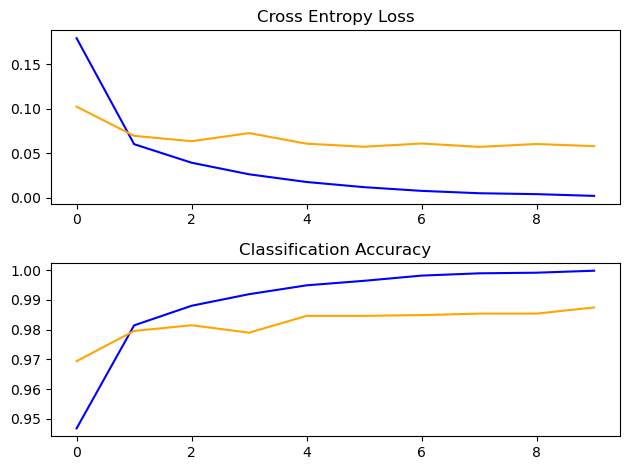

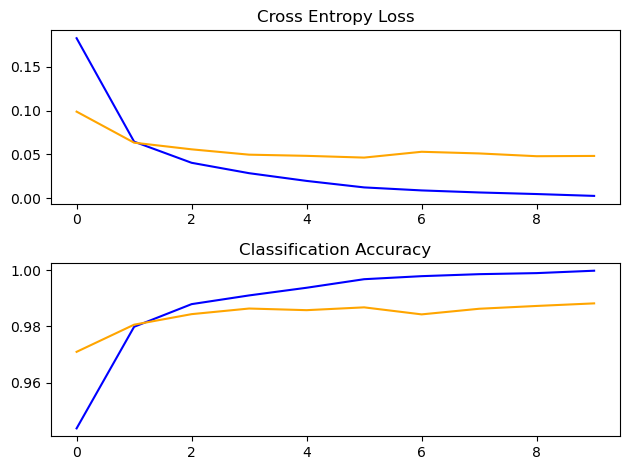

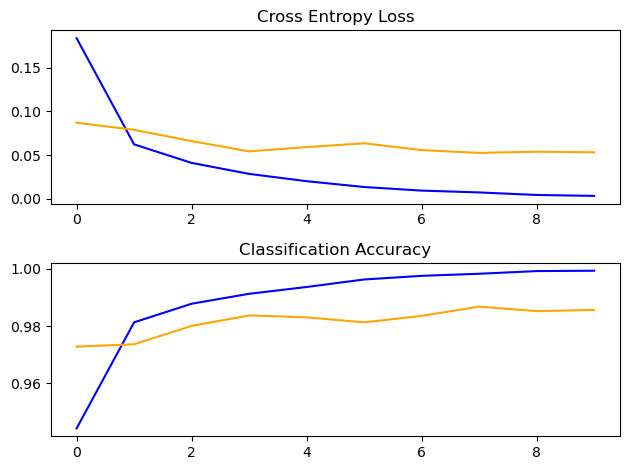

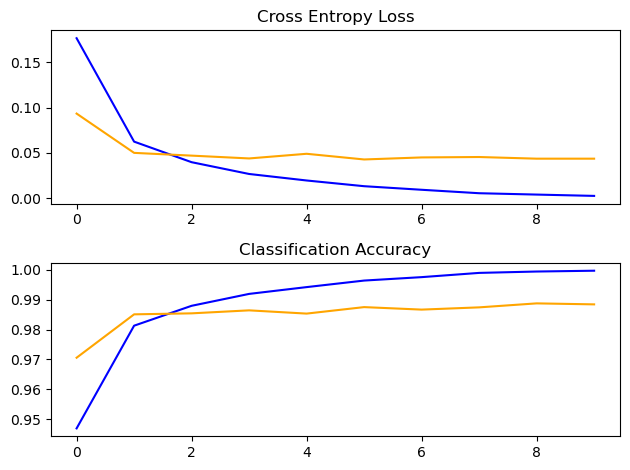

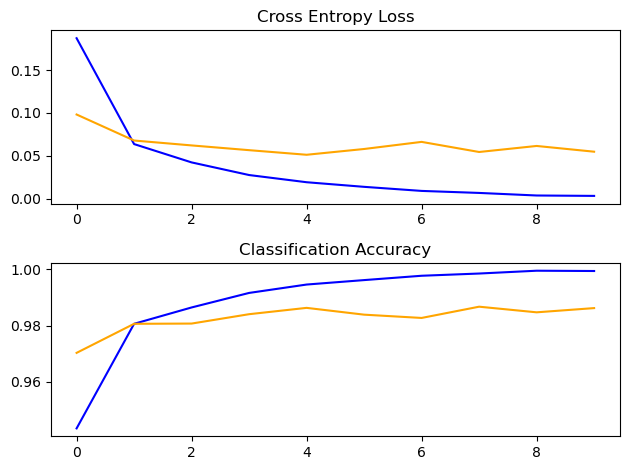

Accuracy: mean=98.720 std=0.107, n=5


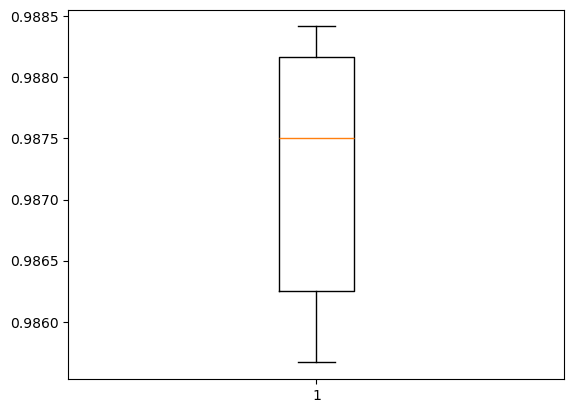

In [2]:
run_test_harness()